Data cleaning.

In [105]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
df = pd.read_csv('Data.csv')
# top20 = df.nlargest(20,['metric_value'])
df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains('accounts')]
df = df.groupby('metric_name').filter(lambda x: len(x) >= 1000)
count = df['metric_name'].value_counts().head(20) 
print(count)


google.accounts:num_users                                      1577
google.accounts:num_7day_logins                                1577
google.accounts:num_disabled_accounts                          1577
google.accounts:num_30day_logins                               1577
google.accounts:num_users_2sv_not_enrolled_and_not_enforced    1577
google.accounts:num_1day_logins                                1577
google.accounts:num_users_2sv_not_enforced                     1577
google.accounts:num_suspended_users                            1577
google.accounts:num_users_2sv_not_enrolled                     1577
google.accounts:num_authorized_apps                            1542
google.accounts:drive_used_quota_in_mb                         1490
google.accounts:gmail_used_quota_in_mb                         1490
google.accounts:used_quota_in_mb                               1490
google.accounts:gplus_photos_used_quota_in_mb                  1490
google.accounts:num_users_less_secure_apps_acces

In [106]:
df['time'] = pd.to_datetime(df['time'])
df = df[pd.to_datetime(df['time']).dt.month == 5]
df = df[pd.to_datetime(df['time']).dt.year == 2015]

temp = df.groupby(['metric_name'])['metric_value'].describe().reset_index()

temp.stack()
temp = temp.set_index('metric_name').T
print(temp)



metric_name  google.accounts:drive_used_quota_in_mb  \
count                                  3.100000e+01   
mean                                   1.243813e+07   
std                                    2.464099e+05   
min                                    1.173856e+07   
25%                                    1.240774e+07   
50%                                    1.252112e+07   
75%                                    1.257108e+07   
max                                    1.265172e+07   

metric_name  google.accounts:gmail_used_quota_in_mb  \
count                                  3.100000e+01   
mean                                   4.007890e+07   
std                                    4.949299e+06   
min                                    3.032206e+07   
25%                                    3.802332e+07   
50%                                    4.088377e+07   
75%                                    4.383323e+07   
max                                    4.676559e+07   

metric_n

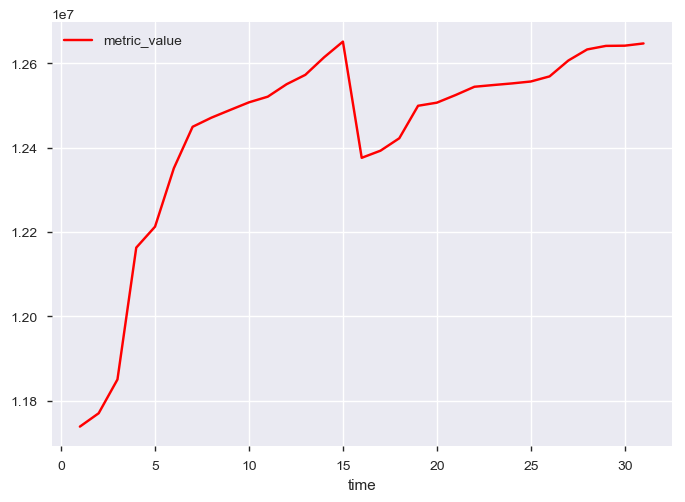

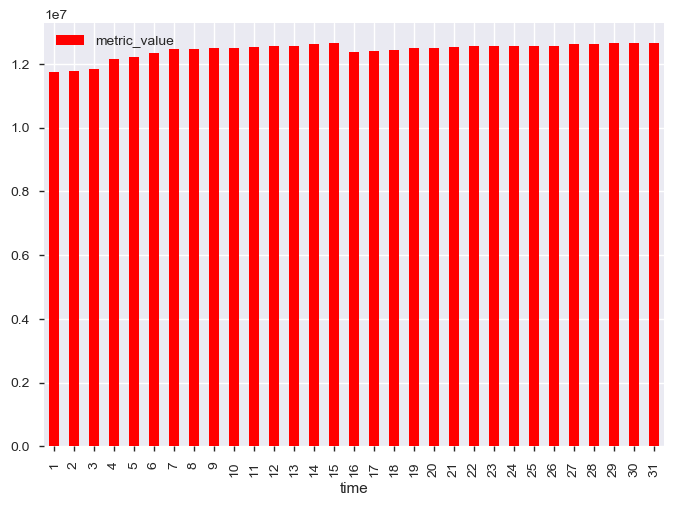

count    3.100000e+01
mean     1.243813e+07
std      2.464099e+05
min      1.173856e+07
25%      1.240774e+07
50%      1.252112e+07
75%      1.257108e+07
max      1.265172e+07
Name: metric_value, dtype: float64
-1.9263529623817468
3.0643778996904123
       time                             metric_name  metric_value
9670      1  google.accounts:drive_used_quota_in_mb      11738562
9920      2  google.accounts:drive_used_quota_in_mb      11770266
10170     3  google.accounts:drive_used_quota_in_mb      11850381
10420     4  google.accounts:drive_used_quota_in_mb      12163050
10670     5  google.accounts:drive_used_quota_in_mb      12212798
10920     6  google.accounts:drive_used_quota_in_mb      12351257
11170     7  google.accounts:drive_used_quota_in_mb      12449712
11420     8  google.accounts:drive_used_quota_in_mb      12471299
11670     9  google.accounts:drive_used_quota_in_mb      12489640
11920    10  google.accounts:drive_used_quota_in_mb      12507706
12170    11  google.acco

In [107]:
df = df[df.metric_name == 'google.accounts:drive_used_quota_in_mb']
df["time"] = df['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()
df.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()


print(df["metric_value"].describe())
print(df["metric_value"].skew())
print(df["metric_value"].kurt())


Function to analyze data and create line-graph/bar-graph.
Also compute 5-number summary
The function has 4 parameters: wanted metric, year, month, and data

df['time'] = pd.to_datetime(df['time'])
df = df[df.metric_value != 0]
df = df[pd.to_datetime(df['time']).dt.month == 5]
df = df[pd.to_datetime(df['time']).dt.year == 2015]
df = df[df.metric_name == 'google.accounts:drive_used_quota_in_mb']
df["time"] = df['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()
df.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()


print(df["metric_value"].describe())
print(df["metric_value"].skew())
print(df["metric_value"].kurt())

print(df)